In [1]:
from time import time
from preamble import *

%matplotlib inline

start_origin = time()
# path to save figures
fig_path='figs/S1_S2_explore/'

/home/jk/Documents/Research/point_identification/point-mapping/clean_code/AEI/clean/input.pkl


## Re-generate the labels

In [2]:
# re-generate new labels : new_tag,yy,new_df
new_tag = ['HeatingOutput', 'CoolingOutput', 'MixedAirTemperature', 'OutsideAirTemperature',
            'ReturnAirTemperature',  'DischargeAirTemperature', 'DischargeAirTemperatureSetpoint', 
            'OutdoorAirHumidity', 'ReturnAirHumidity', 'OutdoorAirDamperOutput', 'MixedAirDamperOutput']

yy = np.array([new_tag.index(raw_tag[i]) if raw_tag[i] in new_tag else len(new_tag) for i in y])
new_tag.append('Other')
new_tag = np.array(new_tag)

new_df = df.copy()
ix = [i not in new_tag for i in new_df['point_name']]
new_df.ix[ix,'point_name']='Other'

## plot data

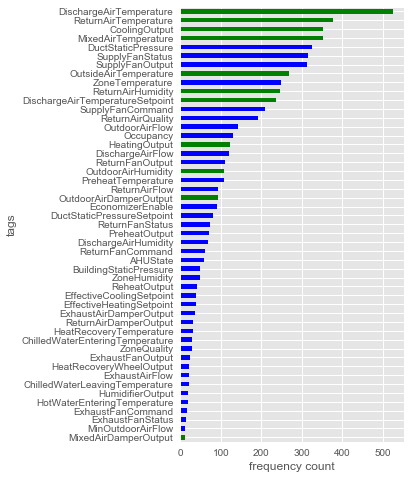

In [3]:
plot_point_frequency_count(y,raw_tag,yy,new_tag,fig_path,cnt_threshold=10)

In [4]:
# We rename it to BRICK standard
BRICK_tag = np.array([ 'AHU_Heating_Valve_Command','AHU_Cooling_Valve_Command','AHU_Mixed_Air_Temperature_Sensor',
                   'AHU_Outside_Air_Temperature_Sensor','AHU_Return_Air_Temperature_Sensor','AHU_Discharge_Air_Temperature_Sensor',
                      'AHU_Discharge_Air_Temperature_Setpoint', 'AHU_Outside_Air_Humidity_Sensor', 'AHU_Return_Air_Humidity_Sensor',
                      'AHU_Outside_Air_Damper_Position_Command','AHU_Mixed_Air_Damper_Position_Command','Other'])
for i,j in enumerate(new_tag):
    new_df.replace(j,BRICK_tag[i],inplace=True)
new_tag = BRICK_tag

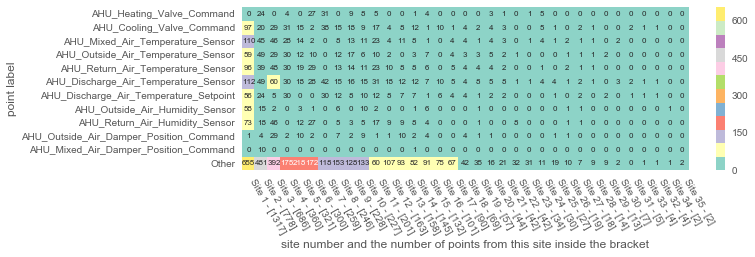

In [5]:
plot_point_count_per_site(new_df,new_tag,fig_path,size=(10,3))

### 2D representation of features

In [6]:
# calculate tsneF and pcaF
start=time()
# from bhtsne import tsne
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing

tsneF = []
pcaF = []
 
pca = PCA(n_components=2,whiten=True)

tsne = TSNE(n_jobs=4,n_components=2, perplexity=30.0,angle=0.5)

for i in F_features:
    tempF = preprocessing.scale(i)
    tsneF.append(tsne.fit_transform(tempF,))
    pcaF.append(pca.fit_transform(tempF))
    
print(time()-start)

83.55524373054504


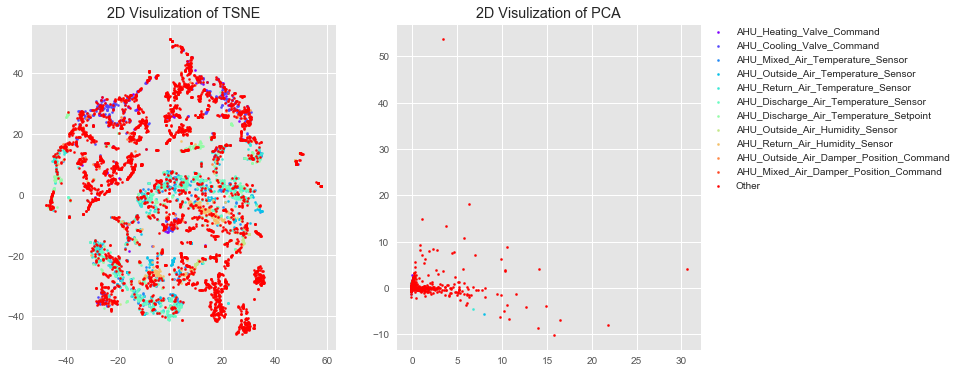

In [7]:
# 2D visualization of F_Combine
plot_2D_visualize(tsneF[-1],pcaF[-1],yy,fig_path+'Combine_2D.pdf',new_tag,size=(12,6),s=4)

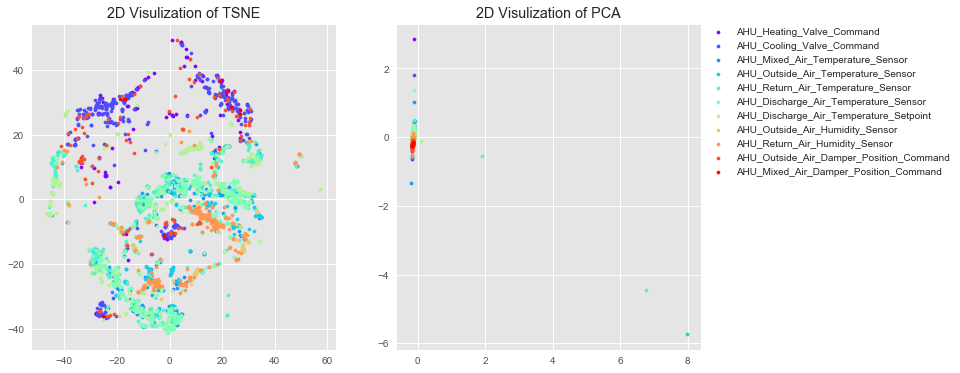

In [8]:
# exclude 'Other'
ix = np.where(yy!=np.max(yy))[0]
plot_2D_visualize(tsneF[-1][ix],pcaF[-1][ix],yy[ix],fig_path+'no_Combine_2D.pdf',new_tag[:11],size=(12,6),s=10)

In [9]:
# plot_2D_visualize(tsneF[-1],pcaF[-1],y,fig_path+'Combine_2D.pdf',raw_tag,size=(12,6),s=4)

## Check feautures, prepare for evaluation

In [10]:
# print feature name and dimension
[(F_names[i],F_features[i].shape) for i in range(len(F_names))]

[('F1: Li et al. 1994', (6145, 3)),
 ('F2: Gao et al. 2015', (6145, 15)),
 ('F3: Hong et al. 2015', (6145, 44)),
 ('F4: Bhattacharya et al. 2015', (6145, 8)),
 ('F5: Balaji et al. 2015', (6145, 24)),
 ('F6: Koh et al. 2016', (6145, 7)),
 ('F7: Combination', (6145, 101))]

## S1

In [11]:
n_iters = 20
train_ratio = .1

S1 = get_S1_metrics(new_df,F_features,F_names,yy,new_tag,clfs,
                    train_size=train_ratio,n_iter=n_iters)

1 - working on Site 5...	 time:0s
2 - working on Site 4...	 time:90s
3 - working on Site 27...	 time:182s
Not enough samples
4 - working on Site 25...	 time:182s
Not enough samples
5 - working on Site 3...	 time:182s
6 - working on Site 7...	 time:277s
7 - working on Site 20...	 time:367s
Not enough samples
8 - working on Site 29...	 time:367s
Not enough samples
9 - working on Site 10...	 time:367s
10 - working on Site 31...	 time:456s
Not enough samples
11 - working on Site 33...	 time:456s
Not enough samples
12 - working on Site 16...	 time:456s
13 - working on Site 28...	 time:544s
Not enough samples
14 - working on Site 23...	 time:544s
Not enough samples
15 - working on Site 32...	 time:544s
Not enough samples
16 - working on Site 8...	 time:544s
17 - working on Site 9...	 time:633s
18 - working on Site 30...	 time:722s
Not enough samples
19 - working on Site 26...	 time:722s
Not enough samples
20 - working on Site 19...	 time:722s
Not enough samples
21 - working on Site 24...	 ti

In [12]:
# site - feature - clf - ave_metric,metric,raw_pred (y_pred,y_prob,y_test)
S1['Site 4']['F1: Li et al. 1994']['Random Forest'][0]

{'accuracy score': 0.71363636363636351,
 'confusion matrix': 0.0,
 'f1': array([ 0.59920124,  0.64632104,  0.90588287,  0.63662263,  0.37420331,
         0.35884303,  0.83776583]),
 'f1-macro': 0.62269142214606188,
 'f1-micro': 0.71363636363636362,
 'f1-weighted': 0.71079173056491374,
 'report': 0.0,
 'run time(s)': 6.304103851318359}

In [13]:
F_names

['F1: Li et al. 1994',
 'F2: Gao et al. 2015',
 'F3: Hong et al. 2015',
 'F4: Bhattacharya et al. 2015',
 'F5: Balaji et al. 2015',
 'F6: Koh et al. 2016',
 'F7: Combination']

In [14]:
get_panel_metric = lambda S,s,f,c,m: pd.Panel([[[S[s_n][f_n][c_n][0][m] for c_n in c] for f_n in f]\
                                                  for s_n in s],items=s,major_axis=f,minor_axis=c)

In [15]:
site_names = list(S1.keys())
clf_names = list(clfs.keys())

S1_ave_f1wt = get_panel_metric(S1,site_names,F_names,clf_names,'f1-weighted')
S1_ave_runtime = get_panel_metric(S1,site_names,F_names,clf_names,'run time(s)')

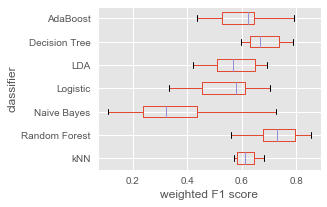

In [16]:
f_n = 'F7: Combination'
S1_F8 = S1_ave_f1wt[:,f_n,:].sort_index(ascending=False)
S1_F8 = S1_F8.T

title = 'performance over %d sites using feature '%S1_F8.shape[0]+f_n

plot_box_over_sites(S1_F8,
                    savename=fig_path+'S1-feature-box-f1wt.pdf',
                    title='')

In [17]:
Counter(S1_F8.idxmax(axis=1)).most_common()

[('Random Forest', 14), ('AdaBoost', 1)]

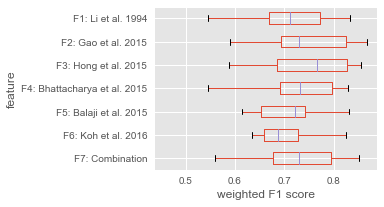

In [18]:
clf_n = 'Random Forest'
S1_RF = S1_ave_f1wt[:,:,clf_n].sort_index(ascending=False)
S1_RF = S1_RF.T

title ='performance over %d sites using '%S1_F8.shape[0]+clf_n

plot_box_over_sites(S1_RF,
                    savename=fig_path+'S1-clf-box-f1wt.pdf',
                    title='',ylabel='feature')

In [19]:
Counter(S1_RF.idxmax(axis=1)).most_common()

[('F2: Gao et al. 2015', 7),
 ('F3: Hong et al. 2015', 3),
 ('F1: Li et al. 1994', 2),
 ('F4: Bhattacharya et al. 2015', 2),
 ('F7: Combination', 1)]

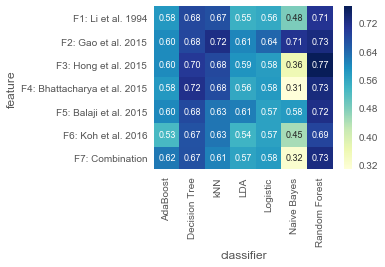

In [20]:
Val = S1_ave_f1wt.median(axis=0)
title='weighted F1 score matrix (median) using S1'
savename = fig_path+'S1-f1wt-median.pdf'

plot_clf_feature_heatmap(Val,savename,'')

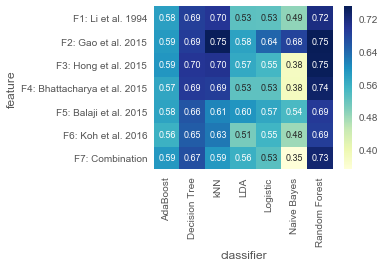

In [21]:
Val = S1_ave_f1wt.mean(axis=0)
title='weighted F1 score matrix (mean) using S1'
savename = fig_path+'S1-f1wt-mean.pdf'

plot_clf_feature_heatmap(Val,savename,'')

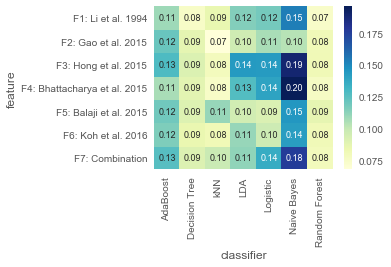

In [22]:
Val = S1_ave_f1wt.std(axis=0)
title='weighted F1 score matrix (std) using S1'
savename = fig_path+'S1-f1wt-std.pdf'

plot_clf_feature_heatmap(Val,savename,'')

In [23]:
# standard deviation for each site using fixed feature and clf, when iterating 20 times
[(s_n,np.std([S1[s_n]['F7: Combination']['Random Forest'][1][i]['f1-weighted'] \
              for i in range(n_iters)])) for s_n in S1.keys()]

[('Site 8', 0.037794576290781742),
 ('Site 16', 0.097845888528731217),
 ('Site 11', 0.066180673988772823),
 ('Site 7', 0.040894963401797303),
 ('Site 1', 0.019340504762570244),
 ('Site 13', 0.033609309886229392),
 ('Site 4', 0.03452034771068449),
 ('Site 12', 0.047985920246937444),
 ('Site 5', 0.028148446520993034),
 ('Site 6', 0.045359154988321201),
 ('Site 10', 0.034502679439395986),
 ('Site 14', 0.046833197309173485),
 ('Site 9', 0.033298391202435357),
 ('Site 3', 0.022226536699986622),
 ('Site 2', 0.021680742693814613)]

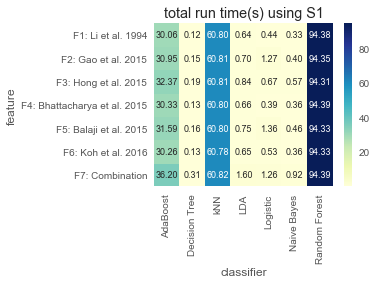

In [24]:
Val = S1_ave_runtime.sum(axis=0)
title='total run time(s) using S1'
savename = fig_path+'S1-runtime.pdf'

plot_clf_feature_heatmap(Val,savename,title,size=(4,3))

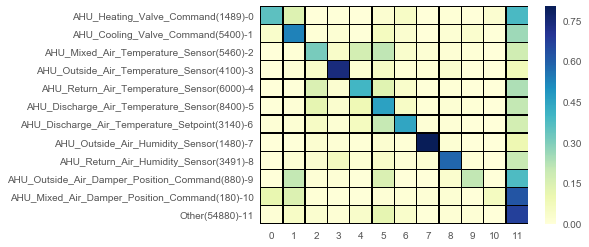

In [25]:
# cfm for S1

f_n = 'F7: Combination'
clf_n = 'Random Forest'

y_pred_S1 = np.hstack([S1[j][f_n][clf_n][2][i][0] for i in range(n_iters) for j in S1.keys()])
temp  =[S1[j][f_n][clf_n][2][i][1] for i in range(n_iters) for j in S1.keys()]
temp2 = [S1[j][f_n][clf_n][2][i][2] for i in range(n_iters) for j in S1.keys()]
sample_prob = np.zeros([len(y_pred_S1),len(new_tag)])
cnt=0
for n,i in enumerate(temp):
    N,_ = i.shape
    for j in range(N):
        sample_prob[cnt,list(set(temp2[n]))] = i[j]
        cnt += 1
y_prob_S1 = sample_prob
y_true_S1 = np.hstack([S1[j][f_n][clf_n][2][i][2] for i in range(n_iters) for j in S1.keys()])

savename = fig_path+'S1-cfm-all.pdf'
plot_heatmap2(y_prob_S1, y_true_S1, new_tag, savename,
#               size=(8,6), title='Confusion matrix normalized by row for S1')
              size=(6,4), title='')


## S2

In [26]:
S2 = get_S2_metrics(new_df,F_features,F_names,yy,new_tag,clfs)

1 - working on F1: Li et al. 1994	 time:43s
2 - working on F2: Gao et al. 2015	 time:158s
3 - working on F3: Hong et al. 2015	 time:262s
4 - working on F4: Bhattacharya et al. 2015	 time:310s
5 - working on F5: Balaji et al. 2015	 time:434s
6 - working on F6: Koh et al. 2016	 time:483s
7 - working on F7: Combination	 time:722s


In [27]:
site_names = list(S2.keys())

In [28]:
S2_ave_f1wt = get_panel_metric(S2,site_names,F_names,clf_names,'f1-weighted')
S2_ave_runtime = get_panel_metric(S2,site_names,F_names,clf_names,'run time(s)')

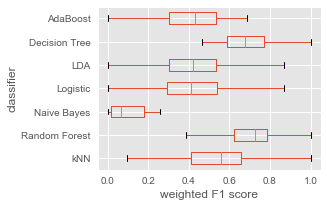

In [29]:
f_n = 'F7: Combination'
S2_F = S2_ave_f1wt[:,f_n,:].sort_index(ascending=False)
S2_F = S2_F.T

title = 'S2: performance over %d sites using feature '%S2_F.shape[0]+f_n

plot_box_over_sites(S2_F,title='',
                    savename=fig_path+'S2-feature-box-f1wt.pdf')

In [30]:
Counter(S2_F.idxmax(axis=1)).most_common()

[('Random Forest', 27), ('Decision Tree', 5), ('kNN', 2), ('Logistic', 1)]

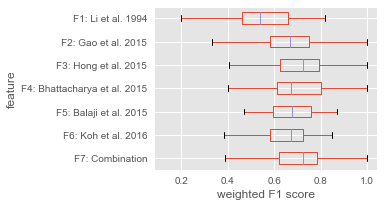

In [31]:
clf_n = 'Random Forest'
S2_RF = S2_ave_f1wt[:,:,clf_n].sort_index(ascending=False)
S2_RF = S2_RF.T

title ='performance over %d sites using '%S2_F.shape[0]+clf_n

plot_box_over_sites(S2_RF,title='',ylabel='feature',
                    savename=fig_path+'S2-clf-box-f1wt.pdf')

In [32]:
Counter(S2_RF.idxmax(axis=1)).most_common()

[('F7: Combination', 11),
 ('F3: Hong et al. 2015', 6),
 ('F5: Balaji et al. 2015', 6),
 ('F6: Koh et al. 2016', 4),
 ('F4: Bhattacharya et al. 2015', 4),
 ('F2: Gao et al. 2015', 2),
 ('F1: Li et al. 1994', 2)]

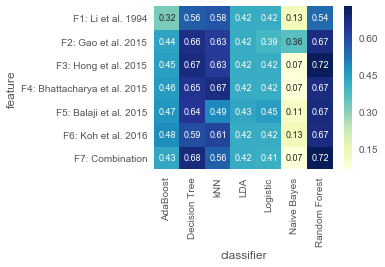

In [33]:
Val = S2_ave_f1wt.median(axis=0)
title='weighted F1 score matrix (median) using S2'
savename = fig_path+'S2-f1wt-median.pdf'

plot_clf_feature_heatmap(Val,savename,'')

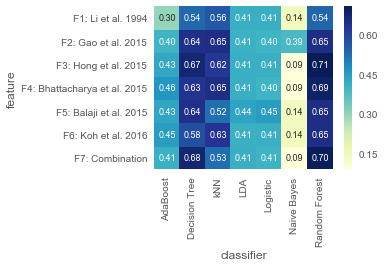

In [34]:
Val = S2_ave_f1wt.mean(axis=0)
title='weighted F1 score matrix (mean) using S2'
savename = fig_path+'S2-f1wt-mean.pdf'

plot_clf_feature_heatmap(Val,savename,'')

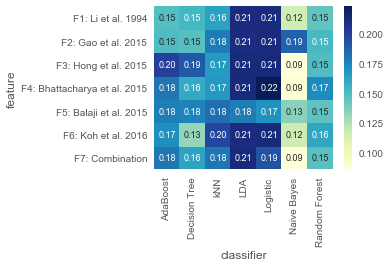

In [35]:
Val = S2_ave_f1wt.std(axis=0)
title='weighted F1 score matrix (std) using S2'
savename = fig_path+'S2-f1wt-std.pdf'

plot_clf_feature_heatmap(Val,savename,'')

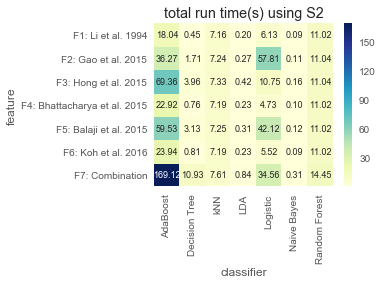

In [36]:
Val = S2_ave_runtime.sum(axis=0)
title='total run time(s) using S2'
savename = fig_path+'S2-runtime.pdf'

plot_clf_feature_heatmap(Val,savename,title,size=(4,3))

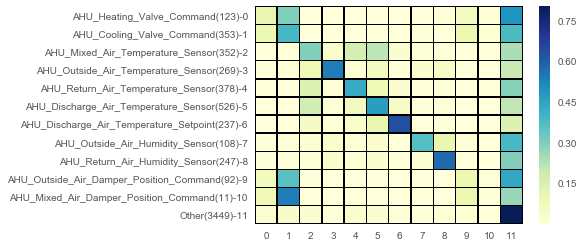

In [37]:
# cfm
f_n = 'F7: Combination'
clf_n = 'Random Forest'

y_pred_S2 = np.hstack([S2[i][f_n][clf_n][1][0] for i in S2.keys()])
y_prob_S2 = np.vstack([S2[i][f_n][clf_n][1][1] for i in S2.keys()])
y_true_S2 = np.hstack([S2[i][f_n][clf_n][1][2] for i in S2.keys()])

savename = fig_path+'S2-cfm-all.pdf'
plot_heatmap2(y_prob_S2, y_true_S2, new_tag, savename,
              size=(6,4), title='')
#               size=(6,4), title='Confusion matrix normalized by row for S2')


## Effects of data

### vary amount of data

In [38]:
# only use F7 & Random Forest
clf_n = 'Random Forest'
this_clf={
 "Random Forest": make_pipeline(RandomForestClassifier(max_depth=15,
                                         n_estimators=100,
                                         max_features='auto',
                                         criterion='gini',
                                         n_jobs=-1))
}

f_n = 'F7: Combination'
this_f = F_features[-1]

#### S1 : vary training ratio


In [39]:
start = time()

S1_vary_data = []
ratio = np.linspace(0.1,0.9,9)

for r in ratio:
    temp = get_S1_metrics(new_df,[this_f],[f_n],yy,new_tag,this_clf,train_size=r,n_iter=2,verbose=False)
    S1_vary_data.append(temp)
    print('training ratio:%.1f, mean f1-wt:%.2f, time consumed: %ds' % 
          (r,np.mean([i[f_n][clf_n][0]['f1-weighted'] for i in temp.values()]),time()-start))
    

training ratio:0.1, mean f1-wt:0.74, time consumed: 10s
training ratio:0.2, mean f1-wt:0.74, time consumed: 26s
training ratio:0.3, mean f1-wt:0.75, time consumed: 43s
training ratio:0.4, mean f1-wt:0.79, time consumed: 61s
training ratio:0.5, mean f1-wt:0.77, time consumed: 81s
training ratio:0.6, mean f1-wt:0.82, time consumed: 99s
training ratio:0.7, mean f1-wt:0.83, time consumed: 116s
training ratio:0.8, mean f1-wt:0.85, time consumed: 129s
training ratio:0.9, mean f1-wt:0.86, time consumed: 140s


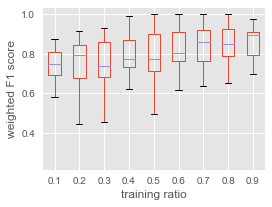

In [40]:
temp_f1wts = []
for i in S1_vary_data:
    temp_f1wts.append([i[s_n][f_n][clf_n][0]['f1-weighted'] for s_n in i.keys()])
Val = pd.DataFrame(temp_f1wts,index=ratio)    

savename = fig_path + 'S1-vary-train-ratio.pdf'
title = 'performance change for S1'
xlabel = 'training ratio'
ylabel = 'weighted F1 score'

plot_box_over_sites(Val.T, savename,'',xlabel,ylabel,vert=True)

#### S2 : vary amount of sites

In [41]:
# we select *count* customers from 35, without replacement
# instead of asking count going up from 10 to 35, we limit it to 25 (C_35^10 = C_35^25)

START = 10
UP_LIMIT = 25
S2_vary_data = []
n_iters = 20

for count in range(START,UP_LIMIT+1):
    temp = []
    temp_sample_count = []
    for _ in range(n_iters):
        selected_customers = np.random.choice(new_df['customer'].unique(),count,replace=False)    
        ix = np.where(new_df['customer'].isin(selected_customers))[0]
        temp_sample_count.append(len(ix))
        temp_df = new_df.ix[ix,:]
        temp.append(get_S2_metrics(temp_df,[this_f[ix,:]],[f_n],yy[ix],new_tag,this_clf,verbose=False))
    S2_vary_data.append(temp)
    print("Number of samples for validation over 20 iterations: mean - %d, std - %d\t %d customers" 
          % (np.mean(temp_sample_count), np.std(temp_sample_count),count))
    
print("time consumed: %ds" % (time()-start))

Number of samples for validation over 20 iterations: mean - 1807, std - 749	 10 customers
Number of samples for validation over 20 iterations: mean - 2132, std - 877	 11 customers
Number of samples for validation over 20 iterations: mean - 1964, std - 897	 12 customers
Number of samples for validation over 20 iterations: mean - 2640, std - 717	 13 customers
Number of samples for validation over 20 iterations: mean - 2681, std - 730	 14 customers
Number of samples for validation over 20 iterations: mean - 2591, std - 811	 15 customers
Number of samples for validation over 20 iterations: mean - 2721, std - 587	 16 customers
Number of samples for validation over 20 iterations: mean - 2780, std - 594	 17 customers
Number of samples for validation over 20 iterations: mean - 3186, std - 740	 18 customers
Number of samples for validation over 20 iterations: mean - 3289, std - 739	 19 customers
Number of samples for validation over 20 iterations: mean - 3525, std - 742	 20 customers
Number of 

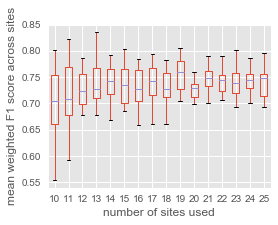

In [42]:
Val = pd.DataFrame([[np.mean([i[j][s_n][f_n][clf_n][0]['f1-weighted'] for s_n in i[j].keys()])
  for j in range(n_iters)] for i in S2_vary_data],index=range(START,UP_LIMIT+1))

savename = fig_path + 'S2-vary-site-amount-boxplot-mean.pdf'
title = 'mean performance change for S2'
xlabel = 'number of sites used'
ylabel = 'mean weighted F1 score across sites'

plot_box_over_sites(Val.T, savename,'',xlabel,ylabel,vert=True)

we don't report other exploration of data effects on this notebook for now.

### probabilistic perspective

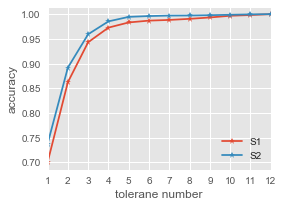

In [44]:
tols = list(range(1,len(new_tag)+1))
S1_tol_metric_df = get_tolerance_metric(y_prob_S1,y_true_S1,tols)
S2_tol_metric_df = get_tolerance_metric(y_prob_S2,y_true_S2,tols)

tol_metric_df = pd.concat([S1_tol_metric_df,S2_tol_metric_df],axis=1)
tol_metric_df.columns = ['S1','S2']

savename = fig_path+'S12-tol-metric.pdf'
title = 'tolerance metrics'
xlabel = 'tolerane number'
ylabel = 'accuracy'

plot_df_line_dot(tol_metric_df, savename,'',xlabel,ylabel,tols)

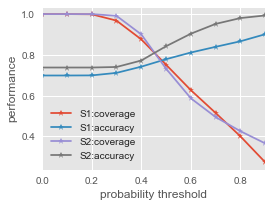

In [45]:
S1_prob_metric_df = get_prob_metric_df(y_prob_S1,y_true_S1,np.linspace(0,0.9,10))
S1_prob_metric_df.columns = ['S1:coverage', 'S1:accuracy']
S2_prob_metric_df = get_prob_metric_df(y_prob_S2,y_true_S2,np.linspace(0,0.9,10))
S2_prob_metric_df.columns = ['S2:coverage', 'S2:accuracy']
prob_metric_df = pd.concat([S1_prob_metric_df,S2_prob_metric_df],axis=1)

savename = fig_path+'S12-prob-metric.pdf'
title='probabilistic metrics'
xlabel = 'probability threshold'
ylabel = 'performance'

plot_df_line_dot(prob_metric_df, savename,'',xlabel,ylabel)


In [46]:
# pickle.dump((S1,train_ratio,n_iters,S2),open(fig_path+'S1S2_Result.pkl','wb'))

In [47]:
print(time()-start_origin)

7423.52832198143
